# On Projections

In [104]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa
from scipy.linalg import svd
import mne


def setup_3d_axes():
    ax = plt.axes(projection='3d')
    ax.view_init(azim=-105, elev=20)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 5)
    ax.set_zlim(0, 5)
    return ax

In [105]:
ax = setup_3d_axes()

# plot the vector (3, 2, 5)
origin = np.zeros((3, 1))
point = np.array([[3, 2, 5]]).T
vector = np.hstack([origin, point])
ax.plot(*vector, color='k')
ax.plot(*point, color='k', marker='o')

# project the vector onto the x,y plane and plot it
xy_projection_matrix = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 0]])
projected_point = xy_projection_matrix @ point
projected_vector = xy_projection_matrix @ vector
ax.plot(*projected_vector, color='C0')
ax.plot(*projected_point, color='C0', marker='o')

# add dashed arrow showing projection
arrow_coords = np.concatenate([point, projected_point - point]).flatten()
ax.quiver3D(*arrow_coords, length=0.96, arrow_length_ratio=0.1, color='C1',
            linewidth=1, linestyle='dashed')

In [107]:
projected_point

array([[3],
       [2],
       [0]])

In [108]:
trigger_effect = np.array([[3, -1, 1]]).T

In [109]:
# compute the plane orthogonal to trigger_effect
x, y = np.meshgrid(np.linspace(-1, 5, 61), np.linspace(-1, 5, 61))
A, B, C = trigger_effect
z = (-A * x - B * y) / C
# cut off the plane below z=0 (just to make the plot nicer)
mask = np.where(z >= 0)
x = x[mask]
y = y[mask]
z = z[mask]

In [110]:
# compute the projection matrix
U, S, V = svd(trigger_effect, full_matrices=False)
trigger_projection_matrix = np.eye(3) - U @ U.T

# project the vector onto the orthogonal plane
projected_point = trigger_projection_matrix @ point
projected_vector = trigger_projection_matrix @ vector

# plot the trigger effect and its orthogonal plane
ax = setup_3d_axes()
ax.plot_trisurf(x, y, z, color='C2', shade=False, alpha=0.25)
ax.quiver3D(*np.concatenate([origin, trigger_effect]).flatten(),
            arrow_length_ratio=0.1, color='C2', alpha=0.5)

# plot the original vector
ax.plot(*vector, color='k')
ax.plot(*point, color='k', marker='o')
offset = np.full((3, 1), 0.1)
ax.text(*(point + offset).flat, '({}, {}, {})'.format(*point.flat), color='k')

# plot the projected vector
ax.plot(*projected_vector, color='C0')
ax.plot(*projected_point, color='C0', marker='o')
offset = np.full((3, 1), -0.2)
ax.text(*(projected_point + offset).flat,
        '({}, {}, {})'.format(*np.round(projected_point.flat, 2)),
        color='C0', horizontalalignment='right')

# add dashed arrow showing projection
arrow_coords = np.concatenate([point, projected_point - point]).flatten()
ax.quiver3D(*arrow_coords, length=0.96, arrow_length_ratio=0.1,
            color='C1', linewidth=1, linestyle='dashed')

In [115]:
svd(trigger_effect, full_matrices=False)

(array([[ 0.90453403],
        [-0.30151134],
        [ 0.30151134]]), array([3.31662479]), array([[1.]]))

In [120]:
U@U.T

array([[ 0.81818182, -0.27272727,  0.27272727],
       [-0.27272727,  0.09090909, -0.09090909],
       [ 0.27272727, -0.09090909,  0.09090909]])

In [5]:
import os
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)
raw.crop(tmax=60).load_data()


Opening raw data file /home/johan/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 36037  =      0.000 ...    60.000 secs...


<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 376 x 36038 (60.0 sec), ~107.0 MB, data loaded>

In [2]:
import mne
from mne.datasets import sample
from matplotlib import pyplot as plt

print(__doc__)

# Setup for reading the raw data
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
event_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw-eve.fif'
event_id, tmin, tmax = 1, -0.2, 0.5

# Read the raw data
raw = mne.io.read_raw_fif(raw_fname, preload=True)
events = mne.read_events(event_fname)

# The EEG channels will be plotted to visualize the difference in referencing
# schemes.
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=True, exclude='bads')

Automatically created module for IPython interactive environment
Opening raw data file /home/johan/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0
Reading 0 ... 41699  =      0.000 ...   277.709 secs...


In [6]:
raw = mne.io.read_raw_fif(sample_data_raw_file)
raw.crop(tmax=60).load_data()

Opening raw data file /home/johan/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 36037  =      0.000 ...    60.000 secs...


<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 376 x 36038 (60.0 sec), ~107.0 MB, data loaded>

In [15]:
first_projector = raw.info['projs'][0]

In [17]:
print(first_projector)
print(first_projector.keys())

<Projection  |  PCA-v1, active : False, n_channels : 102>
dict_keys(['kind', 'active', 'desc', 'data', 'explained_var'])


In [28]:
raw[:,:][0][0, 0]

9.643554807784935e-12

In [29]:
mags = raw.copy().crop(tmax=2).pick_types(meg='mag')

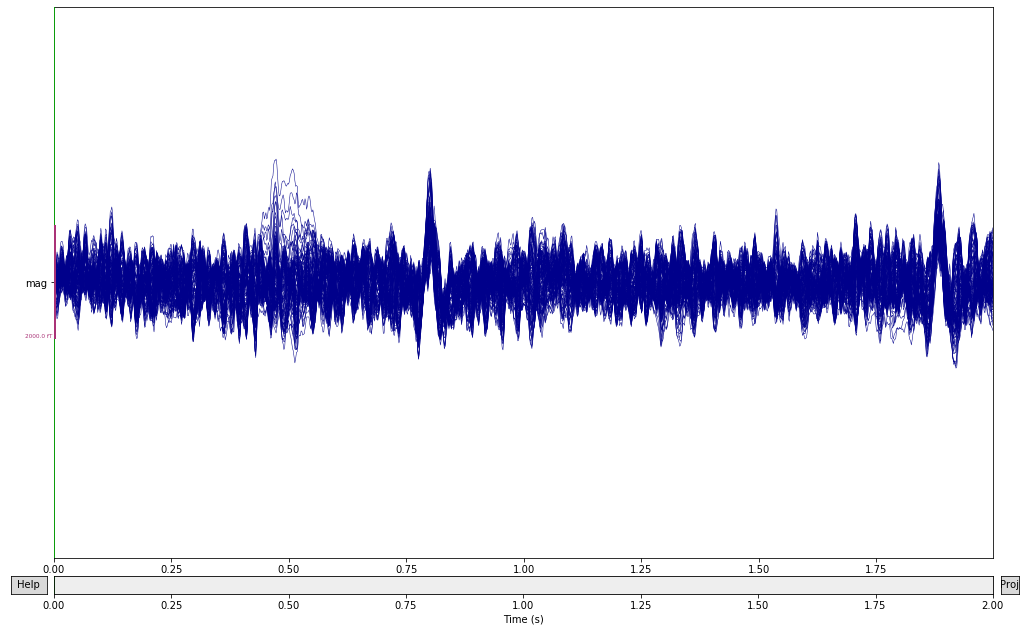

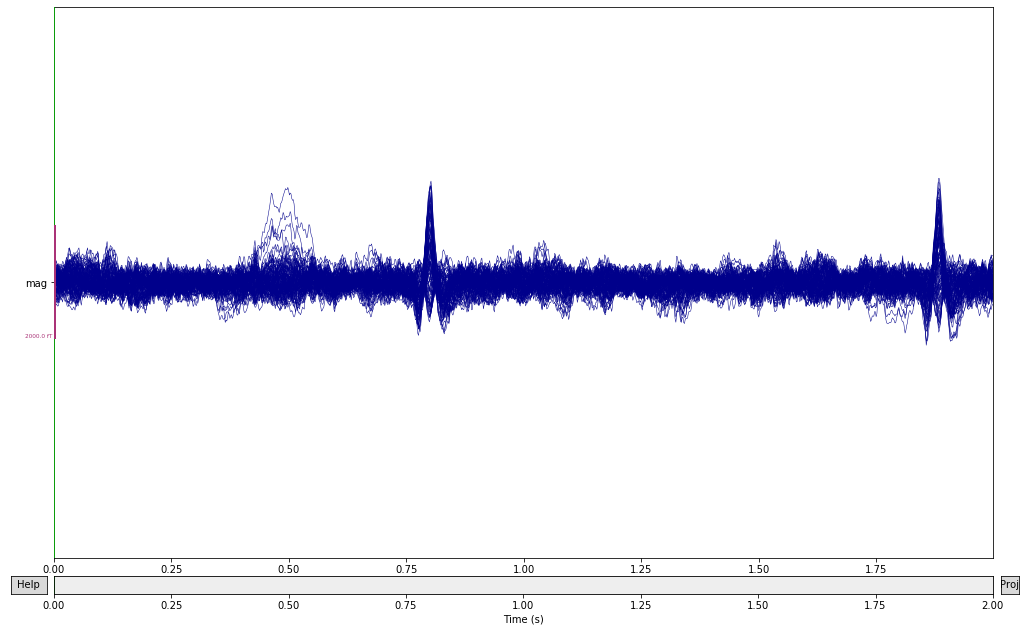

In [30]:
for proj in (False, True):
    fig = mags.plot(butterfly=True, proj=proj)
    fig.subplots_adjust(top=0.9)
    fig.suptitle('proj={}'.format(proj), size='xx-large', weight='bold')

In [31]:
ecg_proj_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                             'sample_audvis_ecg-proj.fif')
ecg_projs = mne.read_proj(ecg_proj_file)
print(ecg_projs)

    Read a total of 6 projection items:
        ECG-planar-999--0.200-0.400-PCA-01 (1 x 203)  idle
        ECG-planar-999--0.200-0.400-PCA-02 (1 x 203)  idle
        ECG-axial-999--0.200-0.400-PCA-01 (1 x 102)  idle
        ECG-axial-999--0.200-0.400-PCA-02 (1 x 102)  idle
        ECG-eeg-999--0.200-0.400-PCA-01 (1 x 59)  idle
        ECG-eeg-999--0.200-0.400-PCA-02 (1 x 59)  idle
[<Projection  |  ECG-planar-999--0.200-0.400-PCA-01, active : False, n_channels : 203>, <Projection  |  ECG-planar-999--0.200-0.400-PCA-02, active : False, n_channels : 203>, <Projection  |  ECG-axial-999--0.200-0.400-PCA-01, active : False, n_channels : 102>, <Projection  |  ECG-axial-999--0.200-0.400-PCA-02, active : False, n_channels : 102>, <Projection  |  ECG-eeg-999--0.200-0.400-PCA-01, active : False, n_channels : 59>, <Projection  |  ECG-eeg-999--0.200-0.400-PCA-02, active : False, n_channels : 59>]


In [49]:
ecg_projs[0]

<Projection  |  ECG-planar-999--0.200-0.400-PCA-01, active : False, n_channels : 203>

In [38]:
ecg_p1.itemsecg_proj_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                             'sample_audvis_ecg-proj.fif')
ecg_projs = mne.read_proj(ecg_proj_file)
print(ecg_projs)

<function Projection.items>

In [53]:
ecgp1=ecg_projs[0]

In [75]:
ecgp1.keys()

dict_keys(['kind', 'active', 'desc', 'data', 'explained_var'])

In [83]:
ecgp1['data']['ncol']

203

In [84]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)

Opening raw data file /home/johan/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0


In [85]:
system_projs = raw.info['projs']
raw.del_proj()
empty_room_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                               'ernoise_raw.fif')
empty_room_raw = mne.io.read_raw_fif(empty_room_file)

Opening raw data file /home/johan/mne_data/MNE-sample-data/MEG/sample/ernoise_raw.fif...
Isotrak not found
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 19800 ... 85867 =     32.966 ...   142.965 secs
Ready.
Current compensation grade : 0


In [86]:
empty_room_raw.del_proj()

<Raw  |  ernoise_raw.fif, n_channels x n_times : 315 x 66068 (110.0 sec), ~619 kB, data not loaded>

In [88]:
%matplotlib qt

In [89]:
for average in (False, True):
    empty_room_raw.plot_psd(average=average, dB=False, xscale='log')

Effective window size : 3.410 (s)
Effective window size : 3.410 (s)
Effective window size : 3.410 (s)
Effective window size : 3.410 (s)


109 matching events found
No baseline correction applied
Not setting metadata
Adding projection: planar-Raw-0.000-110.001-PCA-01
Adding projection: planar-Raw-0.000-110.001-PCA-02
Adding projection: planar-Raw-0.000-110.001-PCA-03
Adding projection: axial-Raw-0.000-110.001-PCA-01
Adding projection: axial-Raw-0.000-110.001-PCA-02
Adding projection: axial-Raw-0.000-110.001-PCA-03


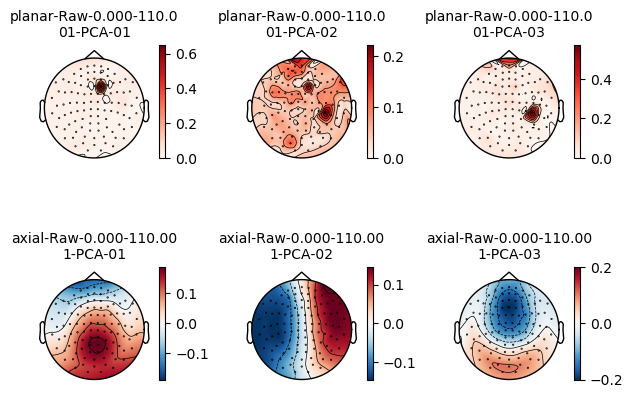

In [91]:
empty_room_projs = mne.compute_proj_raw(empty_room_raw, n_grad=3, n_mag=3)
mne.viz.plot_projs_topomap(empty_room_projs, colorbar=True, 
                           info=empty_room_raw.info)

In [94]:
fig, axs = plt.subplots(2, 3)
for idx, _projs in enumerate([system_projs, empty_room_projs[3:]]):
    mne.viz.plot_projs_topomap(_projs, axes=axs[idx], colorbar=True,
                               info=empty_room_raw.info)

In [96]:
import numpy as np

In [97]:
events = mne.find_events(raw, stim_channel='STI 014')
event_id = {'auditory/left': 1}

# NOTE: appropriate rejection criteria are highly data-dependent
reject = dict(mag=4000e-15,     # 4000 fT
              grad=4000e-13,    # 4000 fT/cm
              eeg=150e-6,       # 150 μV
              eog=250e-6)       # 250 μV

# time range where we expect to see the auditory N100: 50-150 ms post-stimulus
times = np.linspace(0.05, 0.15, 5)

epochs = mne.Epochs(raw, events, event_id, proj='delayed', reject=reject)
fig = epochs.average().plot_topomap(times, proj='interactive')


320 events found
Event IDs: [ 1  2  3  4  5 32]
72 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Entering delayed SSP mode.
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 003', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 005', 'EEG 006', 'EEG 007']
    Rejecting  epoch based on MAG : ['MEG 1131', 'MEG 1411', 'MEG 1421']
    Rejecting  epoch based on EEG : ['EEG 007']
    Rejecting  epoch based on EEG : ['EEG 007']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 015']
    Rejecting  epoch based on EEG : ['EEG 008']
    Rejecting  epoch based on EEG : ['EEG 003', 'EEG 007', 'EEG 008']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 007', 'EEG 015']
    Rejecting  epoc

RuntimeError: Projs are already applied. Please initialize the data with proj set to False.

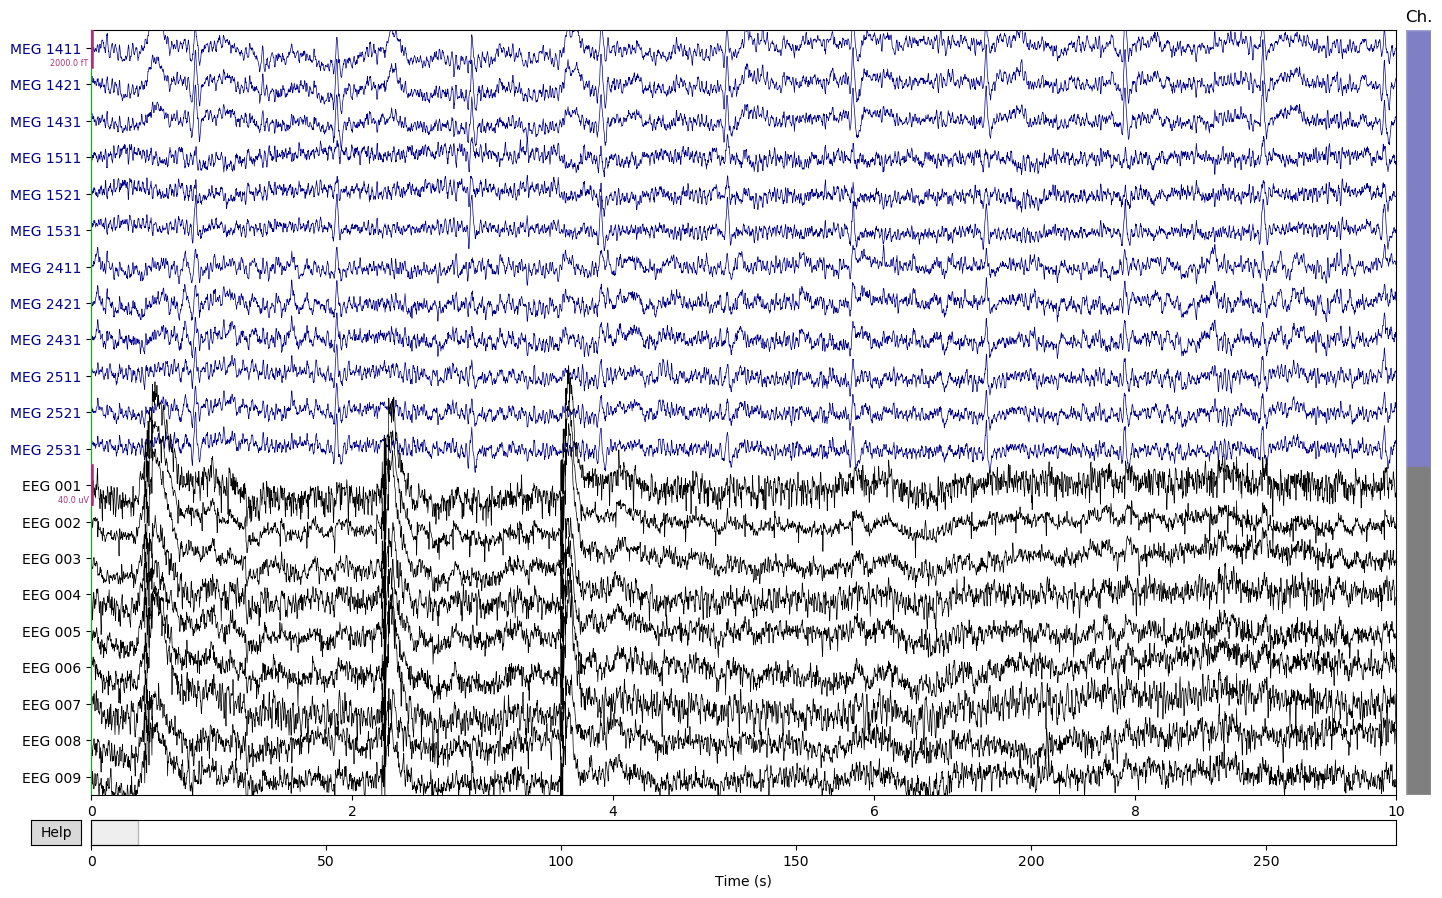

In [98]:
# pick some channels that clearly show heartbeats and blinks
regexp = r'(MEG [12][45][123]1|EEG 00.)'
artifact_picks = mne.pick_channels_regexp(raw.ch_names, regexp=regexp)
raw.plot(order=artifact_picks, n_channels=len(artifact_picks))

In [101]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.preprocessing import (create_eog_epochs, create_ecg_epochs,
                               compute_proj_ecg, compute_proj_eog)

In [103]:
ecg_evoked = create_ecg_epochs(raw).average()
ecg_evoked.plot_joint()

Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 8192 samples (13.639 sec)

Number of ECG events detected : 283 (average pulse 61 / min.)
283 matching events found
No baseline correction applied
Not setting metadata
Loading data for 283 events and 601 original time points ...
0 bad epochs dropped


[<Figure size 800x420 with 7 Axes>,
 <Figure size 800x420 with 7 Axes>,
 <Figure size 800x420 with 7 Axes>]